# Thinkful Capstone Analytic Report and Research Proposal

The US Adult income dataset was downloaded from Kaggle.com ( https://www.kaggle.com/johnolafenwa/us-census-data ). The actual data within the csv file was extracted by Barry Becker from the 1994 US Census Database. There are 32560 rows of data that relate income to social factors such as Age, Education, race, and gender. Income is represented as either earning greater than or less than 50,000 USD a year. Each row is labelled as either having a salary greater than ">50K" or "<=50K".

---

I will be using Visualizations and statistics to answer such questions as:

### Questions regarding Age:
- Per Age, what percentage of people earn greater than 50,000 USD per year?
- What is the mean and median age for those earning over and under 50,000 USD per year?

### Diving deeper, questions regarding Gender: 
- What is the percentage of Male and Females per age
- Of those earning more than 50,000 USD per year, what percentage is Male? What percentage is Female?
- Of those earning less than 50,000 USD per year, what percentage is Male? What percentage is Female?


### Future Questions: Education



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
# Import the csv file into a dataframe for analysis and manipulation

df = pd.read_csv('https://raw.githubusercontent.com/Vonganization/CSV_datasets/master/adult-training.csv', 
                 sep=",",
                 header=None,
                 names=['age','workclass','fnlwgt','education','education_num',
                        'marital_status',
                        'occupation',
                        'relationship',
                        'race',
                        'gender',
                        'capital_gain',
                        'capital_loss',
                        'hours_per_week',
                        'native_country',
                        'income_bracket'
                       ]
                )

def stats(y):
    print('Count of rows: ' + str(y.count()))
    print('Minimum: ' + str(y.min()))
    print('Maxiumum: ' + str(y.max()))
    print('Mean: ' + str(round(y.mean(),2)))
    print('Median: ' + str(y.median()))
    print('Standard Deviation: ' + str(round(y.std(),2)))
    print('Mode: ' + str(y.mode()[0]))

Population Information

Statistics on population by Age for those who earn less than or equal to 50,000 USD
Count of rows: 24720
Minimum: 17
Maxiumum: 90
Mean: 36.78
Median: 34.0
Standard Deviation: 14.02
Mode: 23

Statistics on population by Age for those who earn more than 50,000 USD
Count of rows: 7841
Minimum: 19
Maxiumum: 90
Mean: 44.25
Median: 44.0
Standard Deviation: 10.52
Mode: 37

T-test comparing only <=50k USD and >50k USD
Ttest_indResult(statistic=-43.436244240451096, pvalue=0.0)
Test shows there is a significant difference between the two populations and 0 chance of the difference due to randomness.


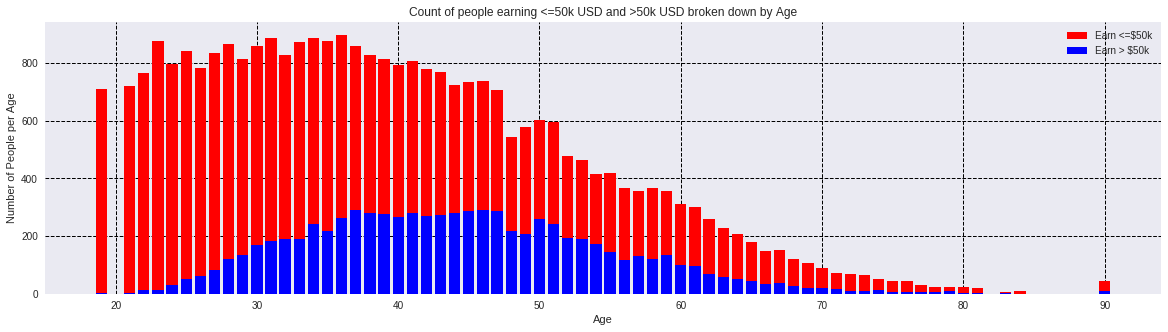

By percent, Top 10 Ages earning less than or equal to 50,000 USD
age  Percent_l50k
 19         99.72
 21         99.58
 23         98.63
 22         98.30
 24         96.12
 25         93.70
 26         91.97
 80         90.91
 27         90.30
 84         90.00

By percent, Top 10 Ages earning greater than 50,000 USD
age  Percent_g50k
 50         43.36
 54         41.69
 79         40.91
 53         40.73
 47         40.68
 51         40.67
 52         40.17
 48         39.96
 46         39.62
 45         39.24



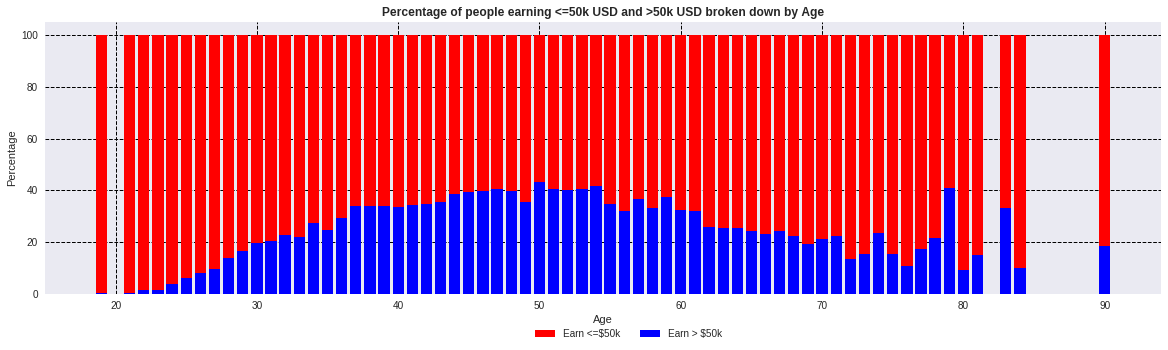

In [18]:
# Create a DataFrame with only Age and Income as only factors
age_and_income = df[['age','income_bracket']]

# Split the data so that we have two dataframes:
# Age with lesser than $50k
age_and_income_l50k = age_and_income[age_and_income['income_bracket']==' <=50K']
# Age with greater than $50k
age_and_income_g50k = age_and_income[age_and_income['income_bracket']==' >50K']

# Get the count of each age
# Rest_index used to add column headers
# Column headers will be used to help identify columns when plotting
age_g50k_group = age_and_income_g50k.groupby('age').agg('count').reset_index()
age_l50k_group = age_and_income_l50k.groupby('age').agg('count').reset_index()

# Renaming column headers
age_g50k_group.columns = ['age','g50k']
age_l50k_group.columns = ['age','l50k']

# Combining the columns of data back together for plotting purposes
# So there will be only one X-axis varible
age_combined = age_g50k_group.merge(age_l50k_group, left_on='age', right_on='age')

# X-axis value
x1 = age_combined['age']

# Y-axis values
y1 = age_combined['l50k']
y2 = age_combined['g50k']

# So the bars will appear stacked on top of each other
y3 = y1 + y2

# looking at percent instead...
y1_p = y1 / y3 * 100
y2_p = y2 / y3 * 100

y3_p = y1_p + y2_p

# Labels for legend
l_l50k = 'Earn <=$50k'
l_g50k = 'Earn > $50k'

# Presents information about our population
print('Population Information')
print('')

# Statistics on population by Age for those who earn <= 50,000 USD
print('Statistics on population by Age for those who earn less than or equal to 50,000 USD')
stats(age_and_income_l50k['age'])
print('')
# Statistics on population by Age for those who earn more than 50,000 USD
print('Statistics on population by Age for those who earn more than 50,000 USD')
stats(age_and_income_g50k['age'])
print('')

# T-test comparing only <=50k USD and >50k USD
print('T-test comparing only <=50k USD and >50k USD')
print(ttest_ind(age_and_income_l50k['age'],age_and_income_g50k['age']))
print('Test shows there is a significant difference between the two populations and 0 chance of the difference due to randomness.')

# Bar of actual Count
plt.figure(figsize=(20,5))
plt.bar(x1, y3, color='Red', label=l_l50k)
plt.bar(x1, y2, color='Blue', label=l_g50k)
plt.ylabel('Number of People per Age')
plt.xlabel('Age')
plt.title('Count of people earning <=50k USD and >50k USD broken down by Age')
plt.grid(b=True, which='both', linestyle='dashed', color='black')
plt.legend(loc="upper right")
plt.show()



# Shows by percent, Top 10 Ages earning less than or equal to 50,000 USD
print('By percent, Top 10 Ages earning less than or equal to 50,000 USD')
age_combined['Percent_l50k'] = round(y1 / y3 * 100, 2)
print(age_combined[['age','Percent_l50k']].nlargest(10, 'Percent_l50k').to_string(index=False))
print('')

# Shows by percent, Top 10 Ages earning greater than 50,000 USD
print('By percent, Top 10 Ages earning greater than 50,000 USD')
age_combined['Percent_g50k'] = round(y2 / y3 * 100, 2)
print(age_combined[['age','Percent_g50k']].nlargest(10, 'Percent_g50k').to_string(index=False))
print('')


# Bar of percent people 
plt.figure(figsize=(20,5))
plt.bar(x1, y3_p, color='Red', label=l_l50k)
plt.bar(x1, y2_p, color='Blue', label=l_g50k)
plt.ylabel('Percentage')
plt.xlabel('Age')
plt.title('Percentage of people earning <=50k USD and >50k USD broken down by Age', fontweight='bold')
plt.legend(bbox_to_anchor=(.615,-0.095), ncol=2)
plt.grid(b=True, which='both', linestyle='dashed', color='black')
plt.show()

Stats for Male workforce by Age
Count of rows: 21790
Minimum: 17
Maxiumum: 90
Mean: 39.43
Median: 38.0
Standard Deviation: 13.37
Mode: 35

Stats for Female workforce by Age
Count of rows: 10771
Minimum: 17
Maxiumum: 90
Mean: 36.86
Median: 35.0
Standard Deviation: 14.01
Mode: 20

T-test comparing Male and Female populations
Ttest_indResult(statistic=16.092517011911756, pvalue=4.8239930687799265e-58)
Test shows there is a significant difference between the two populations and < 0.01 chance of the difference due to randomness.


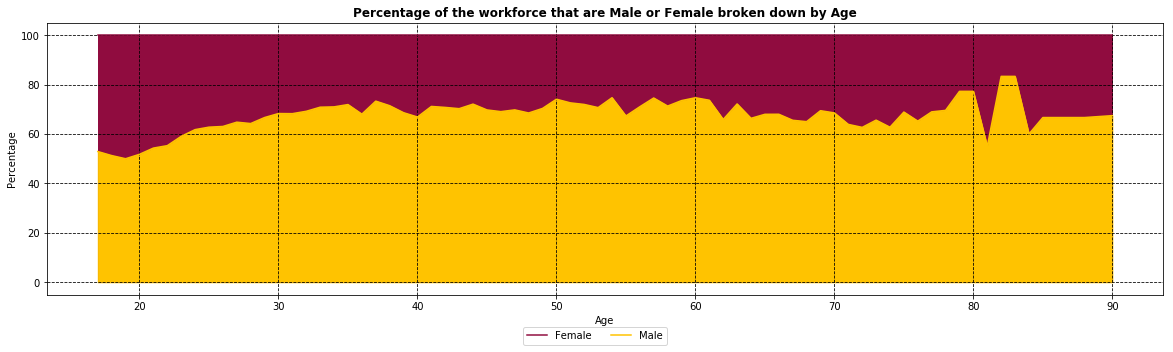

By percent, Top 10 Ages where it is primarily Male workers
 age  percent_male
  82         83.33
  83         83.33
  79         77.27
  80         77.27
  54         74.70
  60         74.68
  57         74.58
  50         74.09
  61         73.67
  59         73.52

By percent, Top 10 Ages where it is primarily Female workers
 age  percent_female
  19           50.00
  18           48.73
  20           48.21
  17           47.09
  21           45.69
  81           45.00
  22           44.71
  23           40.94
  84           40.00
  24           38.22


In [5]:
# Create a Dataframe with Age and Gender only
age_gender = df[['age','gender']]

# Breakup DataFrame into male and female to get count
age_male_only = age_gender[age_gender['gender']==' Male'].groupby('age').agg('count').reset_index()
age_female_only = age_gender[age_gender['gender']==' Female'].groupby('age').agg('count').reset_index()

age_male_only.columns = ['age','male']
age_female_only.columns = ['age', 'female']

# Merge the data to share age column 
age_gender_merged = age_male_only.merge(age_female_only, left_on='age',right_on='age')

# Add percent male and percent female to dataframe
age_gender_total = age_gender_merged['male'] + age_gender_merged['female']

# Create dataframe containing same age value column, with percentage breakdown for Male or Female
age_gender_merged['percent_male'] = round(age_gender_merged['male'] / age_gender_total * 100, 2)
age_gender_merged['percent_female'] = round(age_gender_merged['female'] / age_gender_total * 100, 2)
age_gender_merged['total_percent'] = age_gender_merged['percent_male'] + age_gender_merged['percent_female']


# Stats for Male workforce by Age
print('Stats for Male workforce by Age')
age_male_stats = age_gender[age_gender['gender']==' Male']
stats(age_male_stats['age'])

print('')

# Stats for Female workforce by Age
print('Stats for Female workforce by Age')
age_female_stats = age_gender[age_gender['gender']==' Female']
stats(age_female_stats['age'])

print('')
# T-test comparing Male and Female populations
print('T-test comparing Male and Female populations')
print(ttest_ind(age_male_stats['age'], age_female_stats['age']))
print('Test shows there is a significant difference between the two populations and < 0.01 chance of the difference due to randomness.')

# Create plot of dataframe
plt.figure(figsize=(20,5))
plt.plot(age_gender_merged['age'],age_gender_merged['total_percent'], color='#900C3F', label='Female')
plt.plot(age_gender_merged['age'],age_gender_merged['percent_male'], color='#FFC300', label='Male')
plt.fill_between(age_gender_merged['age'], age_gender_merged['total_percent'], 0, color='#900C3F')
plt.fill_between(age_gender_merged['age'], age_gender_merged['percent_male'], 0, color='#FFC300')
plt.ylabel('Percentage')
plt.xlabel('Age')
plt.title('Percentage of the workforce that are Male or Female broken down by Age', fontweight='bold')
plt.grid(b=True, which='both', linestyle='dashed', color='black')
plt.legend(bbox_to_anchor=(0.560,-0.1), ncol=2)
plt.show()

# Shows by percent, Top 10 Ages where it is primarily Male workers
print('By percent, Top 10 Ages where it is primarily Male workers')
print(age_gender_merged[['age','percent_male']].nlargest(10, 'percent_male').to_string(index=False))
print('')

# Shows by percent, Top 10 Ages where it is primarily Female workers
print('By percent, Top 10 Ages where it is primarily Female workers')
print(age_gender_merged[['age','percent_female']].nlargest(10, 'percent_female').to_string(index=False))

For people who earn <=50k USD, stats for Male workforce by Age
Count of rows: 15128
Minimum: 17
Maxiumum: 90
Mean: 37.15
Median: 35.0
Standard Deviation: 13.86
Mode: 23

For people who earn <=50k USD, stats for Female workforce by Age
Count of rows: 9592
Minimum: 17
Maxiumum: 90
Mean: 36.21
Median: 34.0
Standard Deviation: 14.26
Mode: 20

T-test for those earning <=50k USD, comparing Males and Females by Age
Ttest_indResult(statistic=5.118769813761817, pvalue=3.098380651743999e-07)
Test shows there is a significant difference between the two populations and < 0.01 chance of the difference due to randomness.


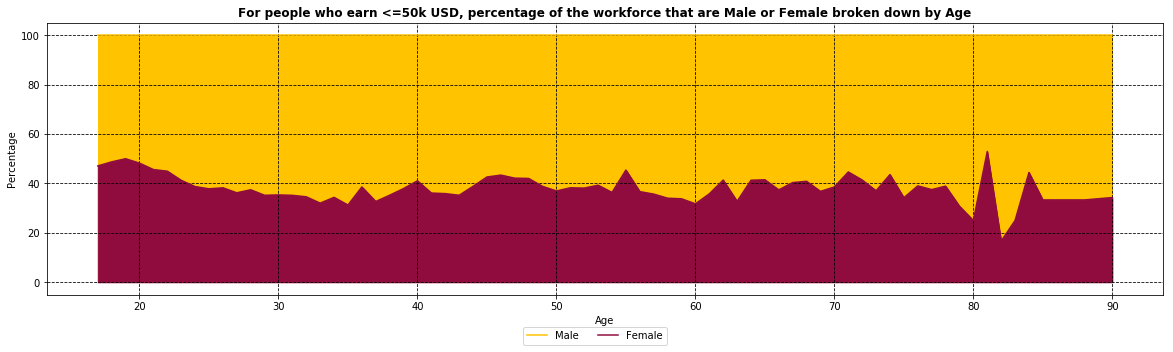

For people who earn <=50k USD, by percent, Top 10 Ages where it is primarily Male workers
 age  p_male
  82   83.33
  80   75.00
  83   75.00
  79   69.23
  35   68.74
  60   68.25
  33   67.98
  37   67.31
  63   67.25
  85   66.67

For people who earn <=50k USD, by percent, Top 10 Ages where it is primarily Female workers
 age  p_female
  81     52.94
  19     50.00
  18     48.73
  20     48.21
  17     47.09
  21     45.61
  55     45.42
  22     44.95
  71     44.64
  84     44.44


In [6]:
# Now need to create two separate dataframes:
# One for those who earn <=50k USD
# Second for those who earn >50k USD

# Create a DataFrame with Age, Gender, Income
age_gender_income = df[['age','gender','income_bracket']]

# Split the data so that we have two dataframes:
# Age with lesser than $50k
age_gender_income_l50k = age_gender_income[age_gender_income['income_bracket']==' <=50K']

# Age with greater than $50k
age_gender_income_g50k = age_gender_income[age_gender_income['income_bracket']==' >50K']

# Now, for those earning <=50k, what percentage is male, and what percentage is female
age_gender_income_l50k_male = age_gender_income_l50k[age_gender_income_l50k['gender']==' Male'].groupby('age').agg('count').reset_index()
age_gender_income_l50k_female = age_gender_income_l50k[age_gender_income_l50k['gender']==' Female'].groupby('age').agg('count').reset_index()

# Rename columns so I can merge dataframes
age_gender_income_l50k_male.columns = ['age','male_count','income_bracket_count']
age_gender_income_l50k_female.columns = ['age','female_count','income_bracket_count']

# Merge
age_gender_income_l50k_merge = age_gender_income_l50k_male[['age','male_count']].merge(age_gender_income_l50k_female[['age','female_count']], left_on='age', right_on='age')

# Add percentages to dataframe
age_gender_income_150k_merge_t = age_gender_income_l50k_merge['male_count'] + age_gender_income_l50k_merge['female_count']
age_gender_income_l50k_merge['p_male'] = round(age_gender_income_l50k_merge['male_count'] / age_gender_income_150k_merge_t * 100, 2)
age_gender_income_l50k_merge['p_female'] = round(age_gender_income_l50k_merge['female_count'] / age_gender_income_150k_merge_t * 100, 2)

# For people who earn <=50k USD, stats for Male workforce by Age
print('For people who earn <=50k USD, stats for Male workforce by Age')
age_male_l50k_stats = age_gender_income_l50k[age_gender_income_l50k['gender']==' Male']
stats(age_male_l50k_stats['age'])

print('')

# For people who earn <=50k USD, stats for Female workforce by Age
print('For people who earn <=50k USD, stats for Female workforce by Age')
age_female_l50k_stats = age_gender_income_l50k[age_gender_income_l50k['gender']==' Female']
stats(age_female_l50k_stats['age'])

print('')

# T-test for those earning <=50k USD, comparing Males and Females by Age
print('T-test for those earning <=50k USD, comparing Males and Females by Age')
print(ttest_ind(age_male_l50k_stats['age'], age_female_l50k_stats['age']))
print('Test shows there is a significant difference between the two populations and < 0.01 chance of the difference due to randomness.')

# Create plot of dataframe
plt.figure(figsize=(20,5))
plt.plot(age_gender_income_l50k_merge['age'],age_gender_income_l50k_merge['p_male'] + age_gender_income_l50k_merge['p_female'], color='#FFC300', label='Male')
plt.plot(age_gender_income_l50k_merge['age'],age_gender_income_l50k_merge['p_female'], color='#900C3F', label='Female')
plt.fill_between(age_gender_income_l50k_merge['age'], age_gender_income_l50k_merge['p_male'] + age_gender_income_l50k_merge['p_female'], 0, color='#FFC300')
plt.fill_between(age_gender_income_l50k_merge['age'], age_gender_income_l50k_merge['p_female'], 0, color='#900C3F')
plt.ylabel('Percentage')
plt.xlabel('Age')
plt.title('For people who earn <=50k USD, percentage of the workforce that are Male or Female broken down by Age', fontweight='bold')
plt.grid(b=True, which='both', linestyle='dashed', color='black')
plt.legend(bbox_to_anchor=(0.560,-0.1), ncol=2)
plt.show()

# For people who earn <=50k USD, shows by percent, Top 10 Ages for Male workers
print('For people who earn <=50k USD, by percent, Top 10 Ages where it is primarily Male workers')
print(age_gender_income_l50k_merge[['age','p_male']].nlargest(10, 'p_male').to_string(index=False))
print('')

# For people who earn <=50k USD, shows by percent, Top 10 Ages for Female workers
print('For people who earn <=50k USD, by percent, Top 10 Ages where it is primarily Female workers')
print(age_gender_income_l50k_merge[['age','p_female']].nlargest(10, 'p_female').to_string(index=False))

For people who earn >50k USD, stats for Male workforce by Age
Count of rows: 6662
Minimum: 19
Maxiumum: 90
Mean: 44.63
Median: 44.0
Standard Deviation: 10.49
Mode: 46

For people who earn >50k USD, stats for Female workforce by Age
Count of rows: 1179
Minimum: 19
Maxiumum: 90
Mean: 42.13
Median: 41.0
Standard Deviation: 10.46
Mode: 43

T-test for those earning >50k USD, comparing Males and Females by Age
Ttest_indResult(statistic=7.549673624514367, pvalue=4.8548482832255065e-14)
Test shows there is a significant difference between the two populations and < 0.01 chance of the difference due to randomness.


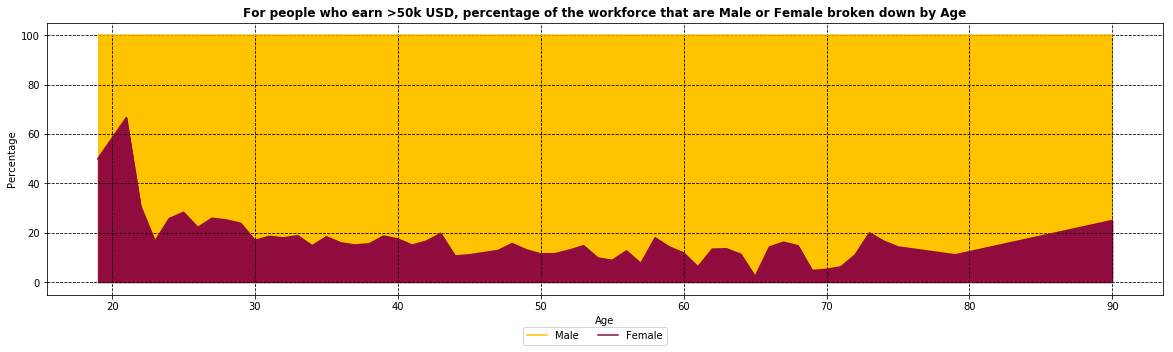

For people who earn >50k USD, by percent, Top 10 Ages where it is primarily Male workers
 age  p_male
  65   97.67
  69   95.24
  70   94.74
  61   93.75
  71   93.75
  57   92.37
  55   91.10
  54   90.17
  44   89.32
  45   88.89

For people who earn >50k USD, by percent, Top 10 Ages where it is primarily Female workers
 age  p_female
  21     66.67
  19     50.00
  22     30.77
  25     28.30
  27     25.93
  24     25.81
  28     25.21
  90     25.00
  29     23.88
  26     22.22


In [7]:
# Second for those who earn >50k USD

# Age with greater than $50k
age_gender_income_g50k = age_gender_income[age_gender_income['income_bracket']==' >50K']

# Now, for those earning >50k, what percentage is male, and what percentage is female
age_gender_income_g50k_male = age_gender_income_g50k[age_gender_income_g50k['gender']==' Male'].groupby('age').agg('count').reset_index()
age_gender_income_g50k_female = age_gender_income_g50k[age_gender_income_g50k['gender']==' Female'].groupby('age').agg('count').reset_index()

# Rename columns so I can merge dataframes
age_gender_income_g50k_male.columns = ['age','male_count','income_bracket_count']
age_gender_income_g50k_female.columns = ['age','female_count','income_bracket_count']

# Merge
age_gender_income_g50k_merge = age_gender_income_g50k_male[['age','male_count']].merge(age_gender_income_g50k_female[['age','female_count']], left_on='age', right_on='age')

# Add percentages to dataframe
age_gender_income_g50k_merge_t = age_gender_income_g50k_merge['male_count'] + age_gender_income_g50k_merge['female_count']
age_gender_income_g50k_merge['p_male'] = round(age_gender_income_g50k_merge['male_count'] / age_gender_income_g50k_merge_t * 100, 2)
age_gender_income_g50k_merge['p_female'] = round(age_gender_income_g50k_merge['female_count'] / age_gender_income_g50k_merge_t * 100, 2)

# For people who earn >50k USD, stats for Male workforce by Age
print('For people who earn >50k USD, stats for Male workforce by Age')
age_male_g50k_stats = age_gender_income_g50k[age_gender_income_g50k['gender']==' Male']
stats(age_male_g50k_stats['age'])

print('')

# For people who earn >50k USD, stats for Female workforce by Age
print('For people who earn >50k USD, stats for Female workforce by Age')
age_female_g50k_stats = age_gender_income_g50k[age_gender_income_g50k['gender']==' Female']
stats(age_female_g50k_stats['age'])

print('')

# T-test for those earning >50k USD, comparing Males and Females by Age
print('T-test for those earning >50k USD, comparing Males and Females by Age')
print(ttest_ind(age_male_g50k_stats['age'], age_female_g50k_stats['age']))
print('Test shows there is a significant difference between the two populations and < 0.01 chance of the difference due to randomness.')


# Create plot of dataframe
plt.figure(figsize=(20,5))
plt.plot(age_gender_income_g50k_merge['age'],age_gender_income_g50k_merge['p_male'] + age_gender_income_g50k_merge['p_female'], color='#FFC300', label='Male')
plt.plot(age_gender_income_g50k_merge['age'],age_gender_income_g50k_merge['p_female'], color='#900C3F', label='Female')
plt.fill_between(age_gender_income_g50k_merge['age'], age_gender_income_g50k_merge['p_male'] + age_gender_income_g50k_merge['p_female'], 0, color='#FFC300')
plt.fill_between(age_gender_income_g50k_merge['age'], age_gender_income_g50k_merge['p_female'], 0, color='#900C3F')
plt.ylabel('Percentage')
plt.xlabel('Age')
plt.title('For people who earn >50k USD, percentage of the workforce that are Male or Female broken down by Age', fontweight='bold')
plt.grid(b=True, which='both', linestyle='dashed', color='black')
plt.legend(bbox_to_anchor=(0.560,-0.1), ncol=2)
plt.show()

# For people who earn >50k USD, shows by percent, Top 10 Ages for Male workers
print('For people who earn >50k USD, by percent, Top 10 Ages where it is primarily Male workers')
print(age_gender_income_g50k_merge[['age','p_male']].nlargest(10, 'p_male').to_string(index=False))
print('')

# For people who earn >50k USD, shows by percent, Top 10 Ages for Female workers
print('For people who earn >50k USD, by percent, Top 10 Ages where it is primarily Female workers')
print(age_gender_income_g50k_merge[['age','p_female']].nlargest(10, 'p_female').to_string(index=False))